<a href="https://colab.research.google.com/github/renatagsr/aprendizado_data_science/blob/master/An%C3%A1lise_de_s%C3%A9ries_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 1**

## Modelo de séries temporais

In [ ]:
import pandas as pd

In [ ]:
co2 = pd.read_csv('co2.csv', delimiter = '\t')

In [ ]:
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

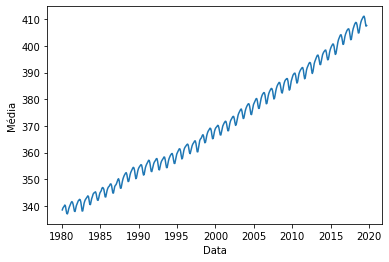

In [ ]:
plt.plot(co2['data'], co2['media'])
plt.ylabel('Média')
plt.xlabel('Data')

Percebe-se que é um modelo sazonal

In [ ]:
nascimento = pd.read_csv('nascimentos.csv')

In [ ]:
nascimento.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


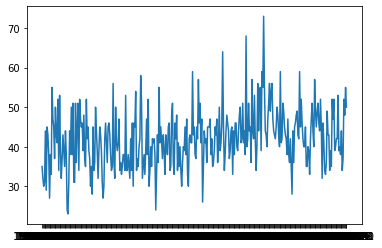

In [ ]:
plt.plot(nascimento['data'], nascimento['n_nasc'])

In [ ]:
nascimento['data'] = pd.to_datetime(nascimento['data'])

In [ ]:
nascimento.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Precisa fazer essa importação para que o matplotlib possa entender que a conversão foi feita. É uma forma de contar para ele o que foi feito

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Através da conversão feita acima a visualização do gráfico ficou melhor. Antes estava ruim por causa da forma que as datas
estavam sendo apresentadas.

Text(0.5, 0, 'Data')

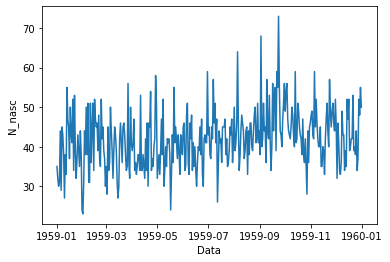

In [ ]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.ylabel('N_nasc')
plt.xlabel('Data')

Através do gráfico gerado percebe-se que ele pode ser um modelo de média zero ou um modelo de passeio aleatório.

##Previsão através da média

In [ ]:
import numpy as np

In [ ]:
media_carb = np.mean(co2['media'])

In [ ]:
dt_carb = co2['data'][1] - co2['data'][0]

Text(0.5, 0, 'Data')

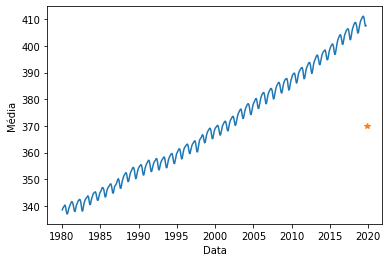

In [ ]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+dt_carb, media_carb, '*')
plt.ylabel('Média')
plt.xlabel('Data')

O ponto gerado está bem longe de onde deveria estar, está bem longe dos últimos pontos. 

In [ ]:
media_nascimento = np.mean(nascimento['n_nasc'])

In [ ]:
dt_nasc = nascimento['data'][1] - nascimento['data'][0]

Text(0.5, 0, 'Data')

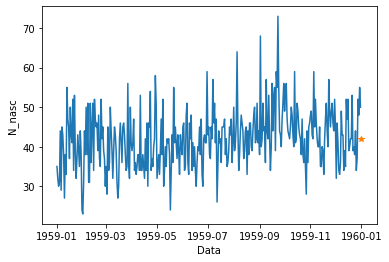

In [ ]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento.iloc[-1,0] + dt_nasc, media_nascimento, '*')
plt.ylabel('N_nasc')
plt.xlabel('Data')

Aqui também houve erro, mas ele é muito menor, isso porque essa base de dados é muito parecida com o modelo de média 0. Uma forma de errar um pouco menos é estimar a média dos últimos 3 pontos que estão muito mais próximos dos valores finais.

In [ ]:
co2.shape

(477, 2)

In [ ]:
media_tres_pontos_co2 = np.mean(co2['media'][474:476])

Text(0.5, 0, 'Data')

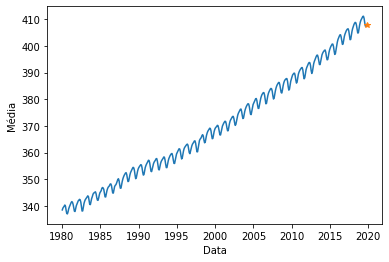

In [ ]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+dt_carb, media_tres_pontos_co2, '*')
plt.ylabel('Média')
plt.xlabel('Data')

Agora a estimativa está muito mais próxima do que ela deveria ser.

In [ ]:
nascimento.shape

(365, 2)

In [ ]:
media_tres_pontos_nascimento = np.mean(nascimento['n_nasc'][362:364])

Text(0.5, 0, 'Data')

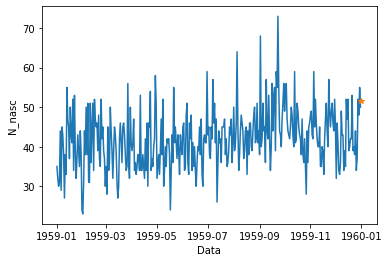

In [ ]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento.iloc[-1,0] + dt_nasc, media_tres_pontos_nascimento, '*')
plt.ylabel('N_nasc')
plt.xlabel('Data')

#**Aula 2**

##Média móvel e decomposição

O rolling(x).mean() vai passar uma janela de x em x pontos calculando a média. Utilizar um valor pequeno é ideal para suavizar a base sem perder características dos dados.

In [ ]:
media_movel_c = co2.rolling(5).mean()

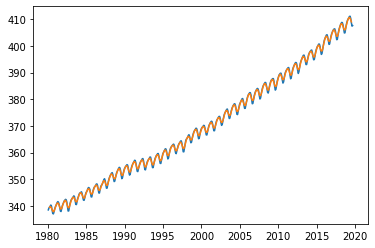

In [ ]:
plt.plot(co2['data'], co2['media'])
plt.plot(media_movel_c['data'], media_movel_c['media'])

In [ ]:
media_movel_nascimento = nascimento.rolling(5).mean()

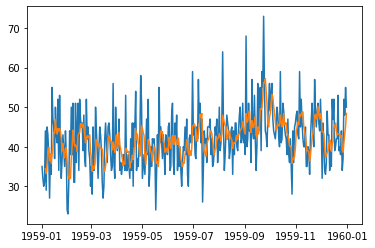

In [ ]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento['data'], media_movel_nascimento['n_nasc'])

Com o traçado laranja facilita fazer estimativas, visto que ficou bem mais suave (com menos ruído) do que o azul.

In [ ]:
#!pip install statsmodels==v0.11.0rc2 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_co2 = seasonal_decompose(co2.set_index('data'), period = 35)
#Period = 35 é o perído escolhido.

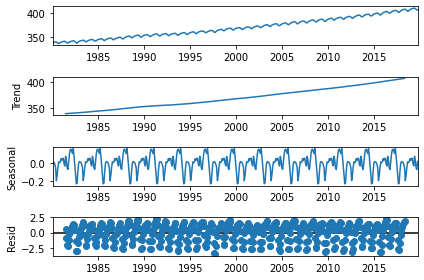

In [ ]:
result_co2.plot();
#Coloca o ponto e vírgula para ele não gerar duas classes de gráficos iguais.

In [ ]:
result_nascimento = seasonal_decompose(nascimento.set_index('data'), period=35)

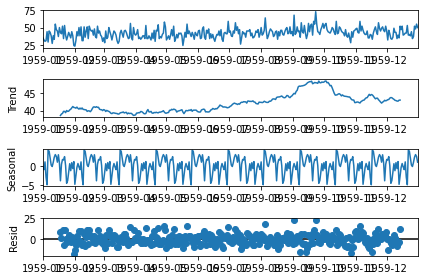

In [ ]:
result_nascimento.plot();

##Estacionariedade

A série ser estacionária significa que as propriedades estátisticas dela não variam ao longo da série.

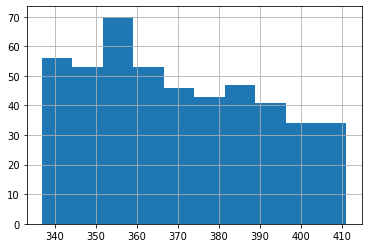

In [ ]:
co2['media'].hist()

Pelo resultado obtido sabe-se que a série não é estacionária, porque uma série estacionária tem um formato de sino que não é caso. 

In [ ]:
divide = int(len(co2)/2) 

In [ ]:
x = co2['media'].values

In [ ]:
c1, c2 = x[0:divide],x[divide:]

In [ ]:
c1.mean()

352.31550420168065

In [ ]:
c2.mean()

387.816359832636

A variação entre a média das duas metades pode ser mais um indicativo de não estacionariedade.

In [ ]:
c1.var()

73.90219533401597

In [ ]:
c2.var()

151.542490933282

Essa grande variação entre os dois resultados é mais um indicativo da não estacionariedade.

In [ ]:
divide = int(len(nascimento)/2)

In [ ]:
x = nascimento['n_nasc'].values

In [ ]:
n1, n2 = x[0:divide],x[divide:]

In [ ]:
n1.mean()

39.76373626373626

In [ ]:
n2.mean()

44.185792349726775

In [ ]:
n1.var()

49.21341021615746

In [ ]:
n2.var()

48.708650601690096

Se comparado com a base de dados do CO2, esse possui muito menos diferenças entre os resultados, o que pode ser mais um indicativo. O fato de não ser estacionário pode não ser um problema, desde que considere isso na resolução.

##Teste ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
resultado_c02 = adfuller(co2['media'].values)

In [ ]:
print('Estatística ADF', resultado_c02[0])

Estatística ADF 3.036828829167


Quanto mais negativo for o resultado do teste ADF, maior o indicativo que a série é estacionária.

In [ ]:
print('p-valor %f' %resultado_c[1])

p-valor 1.000000


Pelo fato do valor do p-valor ser maior do que 0,05 tem mais uma confirmação de que a série não é estacionária.

In [ ]:
resultado_nascimento = adfuller(nascimento['n_nasc'].values)

In [ ]:
resultado_nascimento[0]

-4.808291253559765

In [ ]:
resultado_nascimento[1]

5.2434129901498554e-05

#**Aula 3**

##Suavização exponencial

In [ ]:
co2 = co2.set_index('data')

In [ ]:
co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [ ]:
co2_treino = co2[1980.042:2015]

In [ ]:
co2_teste = co2[2015:]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Primeiro realizamos o ajuste nos dados de treino e posteriormente a previsão. Vamos tentar prever o mesmo número de amostras que a base de testes para efeito de comparação.

In [ ]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
co2_teste.shape

(57, 1)

In [ ]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


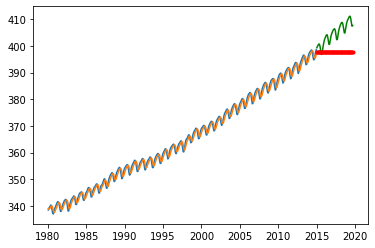

In [ ]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_teste,'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

Percebe-se que a previsão foi muito ruim porque o simplesmoothing está simplesmente calculando a média, como já havia sido feito anteriormente, passando a média como previsão para todos os pontos futuros.

In [ ]:
nascimento = nascimento.set_index('data')

In [ ]:
nascimento_treino = nascimento['1959-01-01':'1959-12-01']

In [ ]:
nascimento_teste = nascimento['1959-12-01':]

In [ ]:
modelo_ajustado = SimpleExpSmoothing(nascimento_treino).fit(smoothing_level = 0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
nascimento_teste.shape[0]

31

In [ ]:
modelo_previsto = modelo_ajustado.forecast(31)

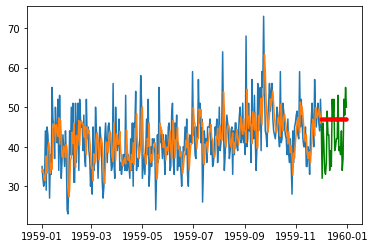

In [ ]:
plt.plot(nascimento_treino)
plt.plot(nascimento_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nascimento_teste,'g')
plt.plot(nascimento_teste.index, modelo_previsto, 'r.')

##Holtwinters aplicado

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
modelo_ajustado =  ExponentialSmoothing(co2_treino.values, trend = 'additive', seasonal= 'additive', seasonal_periods = 35).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
co2.shape

(477, 1)

In [ ]:
co2_teste.shape

(57, 1)

In [ ]:
modelo_previsto = modelo_ajustado.predict(start = 420, end = 476)

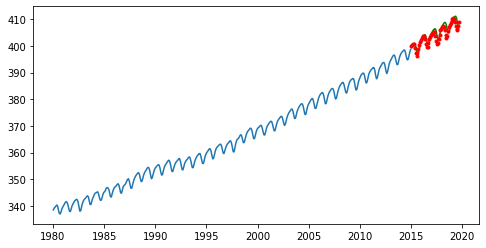

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

Obteve-se uma boa previsão.
Se mudasse o seasonal_periods poderia gerar um resultado não tão bom.

In [ ]:
modelo_ajustado = ExponentialSmoothing(nascimento_treino.values,trend = 'multiplicative', seasonal=None).fit()

In [ ]:
nascimento_treino.shape

(335, 1)

In [ ]:
nascimento_teste.shape

(31, 1)

In [ ]:
modelo_previsto_suave = modelo_ajustado.predict(start=335, end=365)

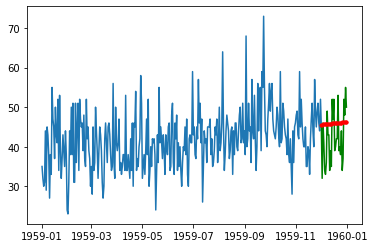

In [ ]:
plt.plot(nascimento_treino)
plt.plot(nascimento_teste, 'g')
plt.plot(nascimento_teste.index, modelo_previsto_suave, 'r.')

O resultado melhorou um pouco em relação a média (resultado obtido antes).

#**Aula 4**

##Autocorrelação

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

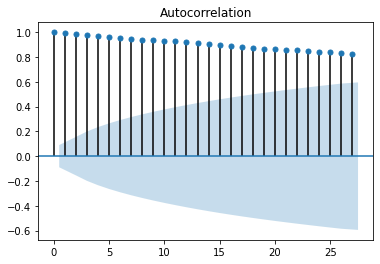

In [ ]:
plot_acf(co2);
#acf = auto correlation fuction

Percebe-se que teve diversos valores altos, próximos de 1, para a auto correlação isso se deve a sazonalidade, tem muitas regiões parecidas nos dados. O cone azul é a uma região de confiança, acima dela tem confiança que tem correlações efetivas. 

##Autocorrelação parcial

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

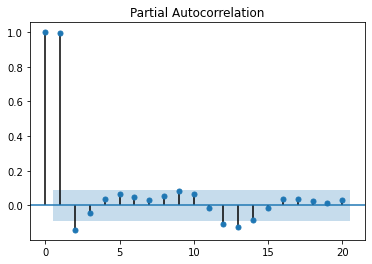

In [ ]:
plot_pacf(co2, lags = 20);

Há dois valore altos no início sustamente por causa da sazonalidade. Com a remoção dos legs na posição 0, todos os outros valores vão para baixo da região azul.

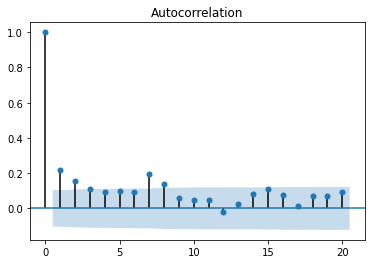

In [ ]:
plot_acf(nascimento['n_nasc'], lags = 20);

Por, praticamente, não ter periodicidade nos dados os valores caem rapidamente, apenas no leg 0 que o o valor é alto. É importante observar o fato de que há valores acima da faixa azul. 

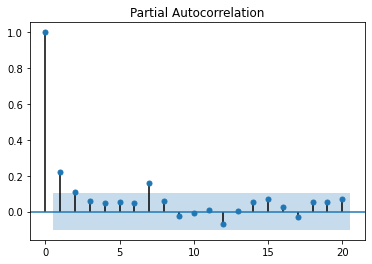

In [ ]:
plot_pacf(nascimento['n_nasc'], lags = 20);

O gráfico da auto correlação parcial é semlhante ao da auto correlação total.

##Modelos autorregresivos

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
lista = np.linspace(1, 40, 40)

In [ ]:
modelo_ajustado = AutoReg(co2_treino.values, lags = lista, trend = 'c', seasonal = True, period = 35).fit()

In [ ]:
modelo_previsto = modelo_ajustado.predict(start = 420, end = 476)

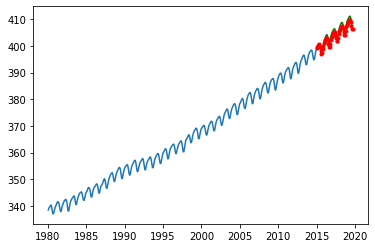

In [ ]:
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [ ]:
modelo_ajustado = AutoReg(nascimento_treino.values, lags = lista, trend = 'c', seasonal = True, period=35).fit()

In [ ]:
modelo_previsto_ar = modelo_ajustado.predict(start = 335, end = 365)

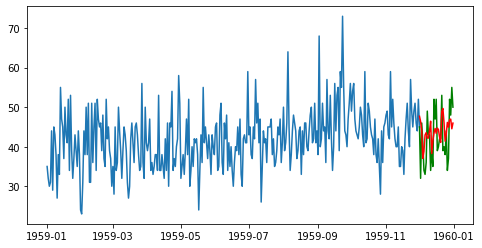

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(nascimento_treino)
plt.plot(nascimento_teste, 'g')
plt.plot(nascimento_teste.index, modelo_previsto_ar, 'r')

#**Aula 5**

##Medidas de perfomance

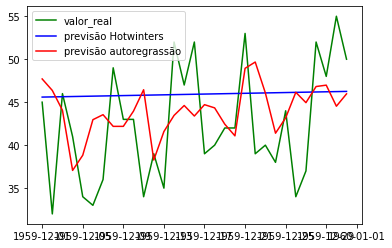

In [ ]:
plt.plot(nascimento_teste, 'g', label = 'valor_real')
plt.plot(nascimento_teste.index, modelo_previsto_suave, 'b-', label = 'previsão Hotwinters')
plt.plot(nascimento_teste.index, modelo_previsto_ar, 'r', label = 'previsão autoregrassão')
plt.legend()

In [ ]:
Erro_prev_s = nascimento_teste['n_nasc'] - modelo_previsto_suave

In [ ]:
Erro_prev = nascimento_teste['n_nasc'] - modelo_previsto_ar

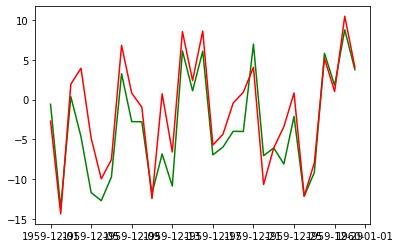

In [ ]:
plt.plot(Erro_prev_s, 'g')
plt.plot(Erro_prev, 'r')

In [ ]:
np.mean(Erro_prev_s)

-3.5361257930475367

In [ ]:
np.mean(Erro_prev)

-1.6083080804496934

O valor menor da média (mais próximo de 0) mostra que nesse ele errou menos.

In [ ]:
np.mean(np.abs(Erro_prev_s))

6.374537352069753

In [ ]:
np.mean(np.abs(Erro_prev))

5.496720548092117

In [ ]:
from sklearn.metrics import  mean_absolute_error

In [ ]:
mae = mean_absolute_error(nascimento_teste['n_nasc'], modelo_previsto_ar)

In [ ]:
mae

5.496720548092117

Observa-se que gerou o mesmo resultado com um número menor de passos.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(nascimento_teste['n_nasc'], modelo_previsto_suave)

54.39586172649378

In [ ]:
mean_squared_error(nascimento_teste['n_nasc'], modelo_previsto_ar)

45.43739422181245

Novamente o erro para o modelo previsto para o modelo autoregressivo, significa que essa estimativa errou menos.